In [ ]:
# Class Task
# 1. Implement GINI method to compute the feature entropy. 
# 2. Compute the remainder of the feature by GINI method. 
# 3. Compute information gain by GINI method. 
# 4. Compute Gain Ratio (GR), for GINI method. 
# 5. write the method that print your decision tree

<!-- Class Task
1. Implement GINI method to compute the feature entropy. 
2. Compute the remainder of the feature by GINI method. 
3. Compute information gain by GINI method. 
4. Compute Gain Ratio (GR), for GINI method. 
5. write the method that print your decision tree -->


Information Gain by Entropy: [1.4205925925925924, 0.8056584156584154, 2.4106666666666667, 2.3505555555555553]
Gain Ratio by Entropy: [0.04063479955928467, 0.03514761928754808, 0.05611258933115945, 0.10722859077656713]


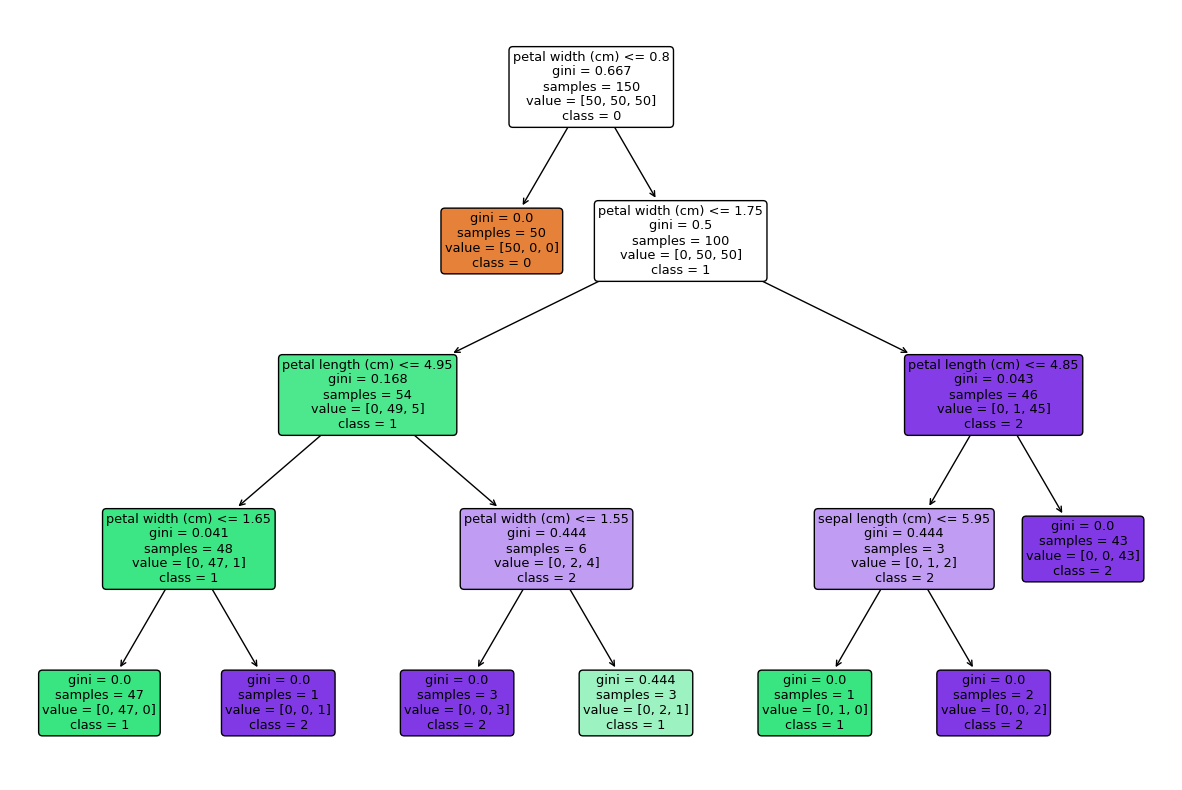

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

class Gini:
    def __init__(self, data, t_label):
        self.data = data
        self.t_label = t_label
        self.clf = None

    def preprocess_data(self):
        pass

    def get_feature_entropy(self, data=None, t_label=None):
        if data is None:
            data = self.data
        if t_label is None:
            t_label = self.t_label

        target = data[t_label]
        class_list = target.unique()
        total_row = data.shape[0]
        total_entr = 0

        for c in class_list:
            total_class_count = data[data[t_label] == c].shape[0]
            total_class_entropy = 1 - (total_class_count / total_row) ** 2
            total_entr += total_class_entropy

        return total_entr

    def get_rem_by_entropy(self):
        desc_features = self.data.drop([self.t_label], axis=1)
        target_feature = self.data[self.t_label]
        target_list = target_feature.unique()
        class_count = desc_features.shape[0]
        rem_list = []

        for item in desc_features.columns:
            rem_feature_entropy = 0
            class_list = desc_features[item].unique()
            new_feature = desc_features[item]

            for level in class_list:
                label_class_count = desc_features[desc_features[item] == level].shape[0]
                entropy_class = 0
                feature_level_entropy = 0
                sum_feature_entropy = 0

                if label_class_count != 0:
                    probability_class = label_class_count / class_count

                    for tvalue in target_list:
                        count_level_frequency = 0

                        for i in range(class_count):
                            if (new_feature[i] == level) and (target_feature[i] == tvalue):
                                count_level_frequency += 1

                        if count_level_frequency != 0:
                            feature_prob = count_level_frequency / label_class_count
                            feature_level_entropy = 1 - (feature_prob ** 2)
                            sum_feature_entropy += feature_level_entropy

                    prob_Xfeature_entropy = probability_class * sum_feature_entropy
                    rem_feature_entropy += prob_Xfeature_entropy

            rem_list.append(rem_feature_entropy)

        return rem_list

    def get_info_gain_by_entropy(self):
        target_entropy = self.get_feature_entropy()
        rem = self.get_rem_by_entropy()
        IG_list = [target_entropy - rem[i] for i in range(len(rem))]
        return IG_list

    def get_GR_by_entropy(self):
        feature_list = self.data.drop([self.t_label], axis=1).columns
        GR_list = []
        count = 0
        IG = self.get_info_gain_by_entropy()

        for item in feature_list:
            feat_entropy = self.get_feature_entropy(None, item)
            GR_list.append(IG[count] / feat_entropy)
            count += 1

        return GR_list

    def build_decision_tree(self, max_depth=None, random_state=None):
        # Build Decision Tree classifier
        self.clf = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, random_state=random_state)
        X = self.data.drop(self.t_label, axis=1)
        y = self.data[self.t_label]
        self.clf.fit(X, y)

    def visualize_tree(self):
        if self.clf is not None:
            plt.figure(figsize=(15, 10))
            plot_tree(self.clf, filled=True, feature_names=self.data.drop(self.t_label, axis=1).columns,
                      class_names=list(map(str, self.clf.classes_)), rounded=True)
            plt.show()
        else:
            print("Decision tree not built. Please run build_decision_tree first.")

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
iris_df['target'] = iris_df['target'].astype(int)

# Example usage with the Iris dataset
gini_instance = Gini(iris_df, 'target')

# Get Information Gain by Entropy
info_gain_list = gini_instance.get_info_gain_by_entropy()
print("Information Gain by Entropy:", info_gain_list)

# Get Gain Ratio by Entropy
gain_ratio_list = gini_instance.get_GR_by_entropy()
print("Gain Ratio by Entropy:", gain_ratio_list)

gini_instance.build_decision_tree(max_depth=4, random_state=1)

gini_instance.visualize_tree()


<!-- # Lab Task -->

<!-- 1. Modify your ID3 algorithm that can accept continuous (e.g. descriptive and target) features. 
2. Compute threshold of each continuous descriptive feature. 
3. Select continuous feature for split the tree based on its variance. 
4. If the target feature is continuous, split your tree by weighted variance method. 
5. write the method that print your decision tree -->

In [14]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

class ID3:
    def __init__(self, data, t_label):
        self.data = data
        self.t_label = t_label

    def get_feature_entropy(self, data=None, t_label=None):
        if data is None:
            data = self.data
        if t_label is None:
            t_label = self.t_label

        target = data[t_label]
        class_list = target.unique()
        total_row = data.shape[0]
        total_entr = 0

        for c in class_list:
            total_class_count = data[data[t_label] == c].shape[0]
            total_class_entropy = - (total_class_count / total_row) * np.log2(
                total_class_count / total_row
            )
            total_entr += total_class_entropy

        return total_entr

    def get_rem_by_entropy(self):
        desc_features = self.data.drop([self.t_label], axis=1)
        target_feature = self.data[self.t_label]
        target_list = target_feature.unique()
        class_count = desc_features.shape[0]
        rem_list = list()

        for item in desc_features.columns:
            rem_feature_entropy = 0
            class_list = desc_features[item].unique()
            new_feature = desc_features[item]

            for level in class_list:
                label_class_count = desc_features[desc_features[item] == level].shape[0]

                if label_class_count != 0:
                    probability_class = label_class_count / class_count

                    for tvalue in target_list:
                        count_level_frequency = 0

                        for i in range(class_count):
                            if (new_feature[i] == level) and (target_feature[i] == tvalue):
                                count_level_frequency += 1

                        if count_level_frequency != 0:
                            feature_prob = count_level_frequency / label_class_count
                            feature_level_entropy = - (feature_prob * np.log2(feature_prob))
                            rem_feature_entropy += feature_level_entropy

                    prob_Xfeature_entropy = probability_class * rem_feature_entropy
                    rem_list.append(prob_Xfeature_entropy)

        return rem_list

    def get_info_gain_by_entropy(self):
        target_entropy = self.get_feature_entropy()
        rem = self.get_rem_by_entropy()
        IG_list = [target_entropy - rem_value for rem_value in rem]
        return IG_list

    def get_GR_by_entropy(self):
        feature_list = self.data.drop([self.t_label], axis=1).columns
        IG = self.get_info_gain_by_entropy()
        GR_list = []

        for i in range(min(len(IG), len(feature_list))):
            feat_entropy = self.get_feature_entropy(data=self.data, t_label=feature_list[i])
            GR_list.append(IG[i] / feat_entropy)

        return GR_list

    def find_best_split_continuous(self, feature):
        unique_values = self.data[feature].unique()
        unique_values.sort()

        variances = [self.data[self.data[feature] == value][self.t_label].var() for value in unique_values]

        best_variance = max(variances)
        best_value = unique_values[variances.index(best_variance)]

        return best_value
# Example usage with the Wine dataset
wine_data = load_wine(as_frame=True)
wine_df = wine_data.frame
id3_instance = ID3(wine_df, 'target')

# Get Information Gain by Entropy
info_gain_list = id3_instance.get_info_gain_by_entropy()
print("Information Gain by Entropy:", info_gain_list)

# Get Gain Ratio by Entropy
gain_ratio_list = id3_instance.get_GR_by_entropy()
print("Gain Ratio by Entropy:", gain_ratio_list)


Information Gain by Entropy: [1.5668222768551812, 1.5668222768551812, 1.5555863217990014, 1.5612042993270914, 1.5555863217990014, 1.5612042993270914, 1.5612042993270914, 1.5555863217990014, 1.5612042993270914, 1.5443503667428216, 1.5443503667428216, 1.5555863217990014, 1.5555863217990014, 1.5555863217990014, 1.5443503667428216, 1.5555863217990014, 1.5555863217990014, 1.5443503667428216, 1.5555863217990014, 1.5555863217990014, 1.5331144116866418, 1.521878456630462, 1.5106425015742824, 1.4994065465181026, 1.333621293684805, 1.5279554463267853, 1.5279554463267853, 1.5279554463267853, 1.5279554463267853, 1.4778526607422093, 1.4666167056860295, 1.5167194912706055, 1.5167194912706055, 1.5167194912706055, 1.4553807506298497, 1.5111015137425154, 1.5111015137425154, 1.4553807506298497, 1.4553807506298497, 1.5111015137425154, 1.4441447955736701, 1.5054835362144257, 1.5054835362144257, 1.5054835362144257, 1.5054835362144257, 1.5054835362144257, 1.5054835362144257, 1.5054835362144257, 1.5054835362

Gain Ratio by Entropy: [0.23091359244653284, 0.2277618817597647, 0.2584293527672926, 0.2930580980068882, 0.29303172115570203, 0.24792232958401433, 0.2253978322474846, 0.3134295369425843, 0.24618305769024476, 0.22437944486686698, 0.25672420475534746, 0.23016379361533554, 0.23124205670836692]


In [2]:
import pandas as pd
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
iris_data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Compute the mean threshold for each continuous feature
thresholds = {}
for feature in iris_data.columns[:-1]:
    if np.issubdtype(iris_data[feature].dtype, np.number):
        mean_threshold = iris_data[feature].mean()
        thresholds[feature] = mean_threshold

# Display the computed thresholds
print("Computed Thresholds:")
for feature, threshold in thresholds.items():
    print(f"{feature}: {threshold}")


Computed Thresholds:
sepal length (cm): 5.843333333333335
sepal width (cm): 3.057333333333334
petal length (cm): 3.7580000000000027
petal width (cm): 1.199333333333334


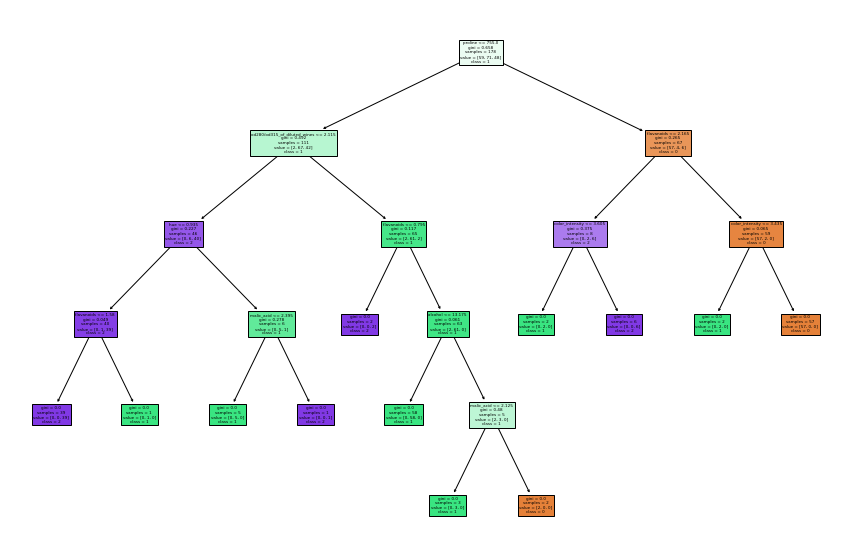

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming you have a decision tree model
clf = DecisionTreeClassifier()
clf.fit(wine_df.drop('target', axis=1), wine_df['target'])

# Convert class names to strings
class_names_str = wine_df['target'].astype(str).unique()

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=wine_df.drop('target', axis=1).columns, class_names=class_names_str, filled=True)
plt.show()
